# LAB 1 - EXPLORING TIME SERIES DATA

In this first lab, you will be given two tasks:

1. Explore the evolution of the Apple stock price. In this case I give you the code to create the required visualizations. Read the descriptions and try to understand what the code does before running it.

2. Explore the evolution of the Chinese GDP. In this case you will need to adapt the code from part 1 to this new time series.

## PART 1 - APPLE CLOSING PRICES

The following code downloads the daily closing prices of Apple from the `yfinance` library. We consider the years 2019-2024 for illustration. To check that everything worked correctly we print the beginning of the time series.

In [5]:
import pandas as pd
import yfinance as yf

# Download Apple (AAPL) closing prices from Yahoo Finance
aapl = yf.download("AAPL", start="2019-01-01", end="2024-12-31")

# Keep only the 'Close' price
aapl = aapl[['Close']]

# Display the first few rows
aapl.head()


[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2019-01-02,39.480000
2019-01-03,35.547501
2019-01-04,37.064999
2019-01-07,36.982498
2019-01-08,37.687500


As a first step we always plot the time series. Comment on its behavior. What characteristics do you observe? Does it have a trend or seasonality? Is it stationary?

In [25]:
import plotly_express as px

px.line(aapl['Close'], 
        labels = {'value': 'Closing Price', 'Date': 'Date'},
        title = 'Apple Closing Price (USD) [2019-01-01 - 2024-12-31]', 
        template = 'plotly_dark')

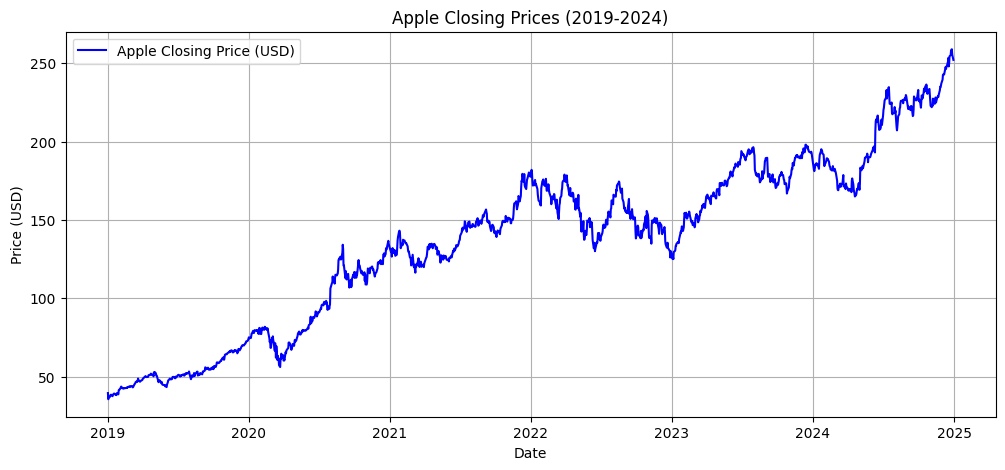

In [6]:
import matplotlib.pyplot as plt

# Plot Apple closing prices
plt.figure(figsize=(12, 5))
plt.plot(aapl.index, aapl['Close'], label='Apple Closing Price (USD)', color='blue')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Apple Closing Prices (2019-2024)")
plt.legend()
plt.grid()
plt.show()


The following plot creates the correlogram, or ACF plot. Actually you should already have a feeling of what it might look like. Before running the code sketch its appearance and then check if your intuition matches the reality.

<Figure size 800x500 with 0 Axes>

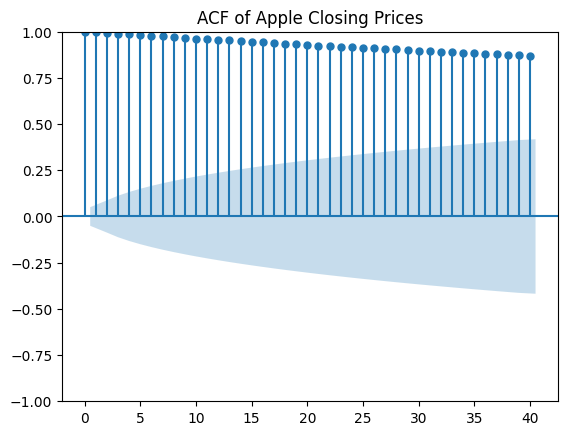

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of Apple closing prices
plt.figure(figsize=(8, 5))
plot_acf(aapl['Close'], lags=40)
plt.title("ACF of Apple Closing Prices")
plt.show()


When we analyze financial time series, we rarely work with the closing prices. We will discuss this further in later classes but we always take the **log-returns**. Let $P_t$ be the closing price at time $t$. We define the log-return at time $t$ of the financial index as:

$$
R_t = \log\left(\frac{P_t}{P_{t-1}}\right)= \log(P_t)-\log(P_{t-1}
).
$$

So in a nutshell we are taking the logarithm of the data and then computing the difference of consecutive observations.

The following plot first computes the log-returns and the plots the time series together with the correlogram. Comment on the aspect of the two plots. Is the series stationary? What does the ACF plot tell us?

C:\Users\SLO\AppData\Local\Temp\ipykernel_32568\4210213843.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



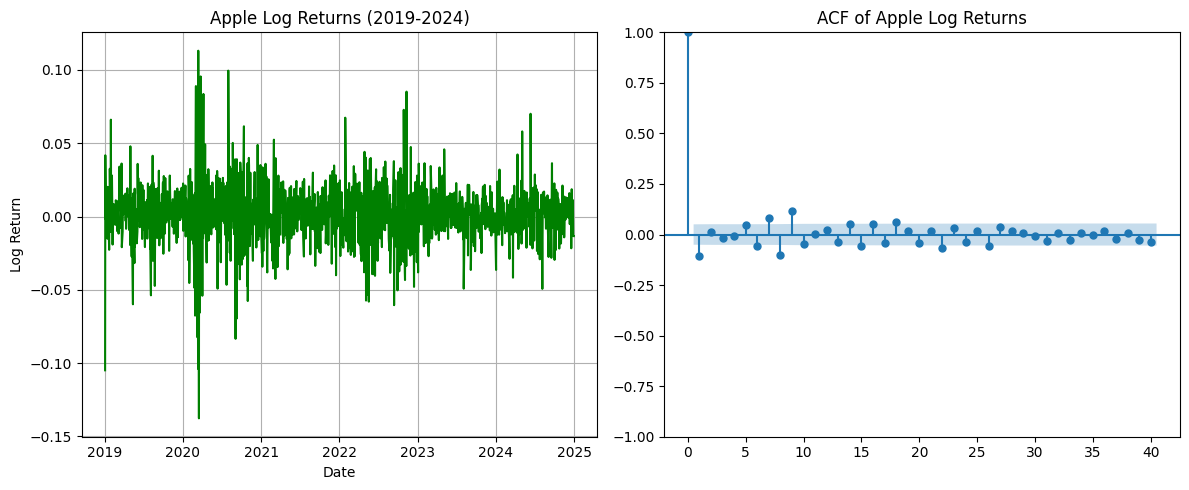

In [40]:
import numpy as np

# Compute log-returns
aapl['Log Returns'] = np.log(aapl['Close'] / aapl['Close'].shift(1))

# Drop NaN values before plotting
aapl = aapl.dropna()

# Ensure enough data for ACF lags
max_lags = min(40, len(aapl)-1)  # Limit lags if data is too short

# Plot log-returns alongside ACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Returns Plot
axes[0].plot(aapl.index, aapl['Log Returns'], label='Apple Log Returns', color='green')
axes[0].set_title("Apple Log Returns (2019-2024)")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Log Return")
axes[0].grid()

# ACF of Log Returns
plot_acf(aapl['Log Returns'], lags=max_lags, ax=axes[1])  # Fix: Ensure lags do not exceed available data
axes[1].set_title("ACF of Apple Log Returns")

plt.tight_layout()
plt.show()

To practice with Python syntax, we assume the data is stationary and hence we can compute the main summary statistics. Make sure to understand their meaning!

In [42]:
# Compute statistics for Apple Log-Returns
logret_mean = aapl['Log Returns'].mean()
logret_var = aapl['Log Returns'].var()
logret_acf1 = aapl['Log Returns'].autocorr(lag=1)  # Autocorrelation at lag 1
logret_acf2 = aapl['Log Returns'].autocorr(lag=2)  # Autocorrelation at lag 2
logret_acf3 = aapl['Log Returns'].autocorr(lag=3)  # Autocorrelation at lag 3

print("Apple Log Returns Statistics:")
print(f"Mean: {logret_mean:.6f}, Variance: {logret_var:.6f}, Autocorrelation (lag 1): {logret_acf1:.4f}, Autocorrelation (lag 2): {logret_acf2:.4f}, Autocorrelation (lag 3): {logret_acf3:.4f}")

Apple Log Returns Statistics:
Mean: 0.001230, Variance: 0.000378, Autocorrelation (lag 1): -0.1091, Autocorrelation (lag 2): 0.0113, Autocorrelation (lag 3): -0.0189


We now conclude the exploration of the Apple stock with a new class of plots we have not seen in class. In order to understand autocorrelation, we often plot a time series ($R_t$) against its lagged values ($R_{t+h}$) for a specific $h$ in a scatterplot.

Given the correlogram above and the summary statistics, how do you expect the lag1 and lag2 scatterplots to look like?

The following code creates these plots. Do they look the way you expected?

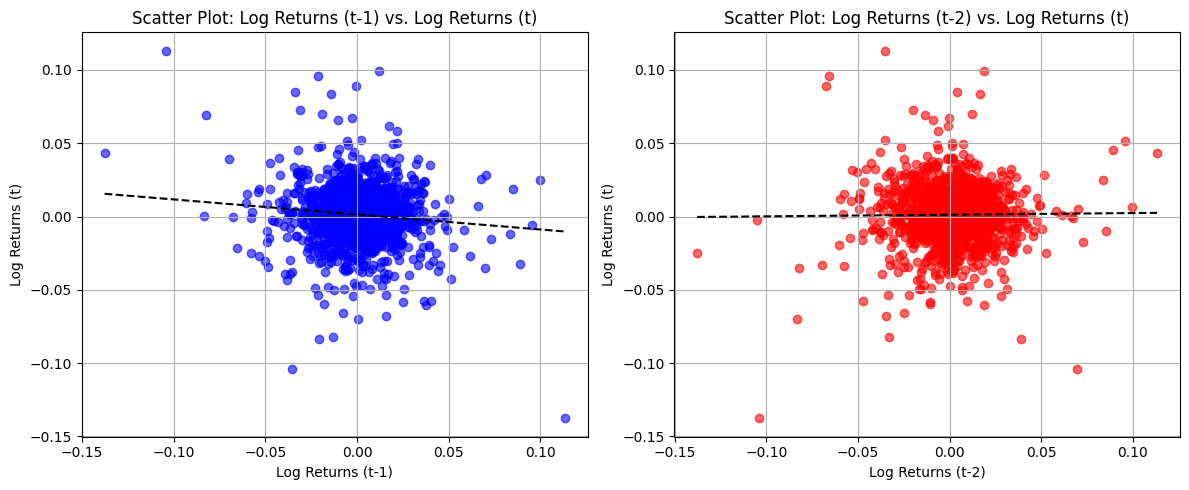

In [ ]:
# Create lagged variables
aapl["Log Returns Lag1"] = aapl["Log Returns"].shift(1)  # Lag 1
aapl["Log Returns Lag2"] = aapl["Log Returns"].shift(2)  # Lag 2

# Drop NaN values for plotting
aapl.dropna(inplace=True)

# Create scatter plots for lagged relationships
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Lag 1 scatter plot: Log Returns (t-1) vs Log Returns (t)
axes[0].scatter(aapl["Log Returns Lag1"], aapl["Log Returns"], color="blue", alpha=0.6)
axes[0].set_title("Scatter Plot: Log Returns (t-1) vs. Log Returns (t)")
axes[0].set_xlabel("Log Returns (t-1)")
axes[0].set_ylabel("Log Returns (t)")
axes[0].grid()

# Compute regression line for Lag 1
slope1, intercept1 = np.polyfit(aapl["Log Returns Lag1"], aapl["Log Returns"], 1)
x_vals1 = np.linspace(aapl["Log Returns Lag1"].min(), aapl["Log Returns Lag1"].max(), 100)
y_vals1 = slope1 * x_vals1 + intercept1
axes[0].plot(x_vals1, y_vals1, color="black", linestyle="--")  # Add regression line


# Lag 2 scatter plot: Log Returns (t-2) vs Log Returns (t)
axes[1].scatter(aapl["Log Returns Lag2"], aapl["Log Returns"], color="red", alpha=0.6)
axes[1].set_title("Scatter Plot: Log Returns (t-2) vs. Log Returns (t)")
axes[1].set_xlabel("Log Returns (t-2)")
axes[1].set_ylabel("Log Returns (t)")
axes[1].grid()

# Compute regression line for Lag 2
slope2, intercept2 = np.polyfit(aapl["Log Returns Lag2"], aapl["Log Returns"], 1)
x_vals2 = np.linspace(aapl["Log Returns Lag2"].min(), aapl["Log Returns Lag2"].max(), 100)
y_vals2 = slope2 * x_vals2 + intercept2
axes[1].plot(x_vals2, y_vals2, color="black", linestyle="--")  # Add regression line

# Adjust layout
plt.tight_layout()

plt.show()

## PART 2 - QUARTERLY CHINESE GDP

The file `gdpchina.xlsx` stores the quarterly Chinese GDP from 1996 to 2017. Make sure to upload it to the session for you to use it. The following code loads the data and shows the first few values.

In [28]:
# Step 5: Reload the cleaned dataset
gdpchina = pd.read_excel("./CSV_FILES/gdpchina.xlsx", index_col="Date", parse_dates=True)

print(gdpchina.head())

                GDP
Date               
1996-03-31  14572.6
1996-06-30  17286.2
1996-09-30  18457.9
1996-12-31  21255.6
1997-03-31  16622.6


Create the time series plot and the correlogram. Comment on their appearance.

<Figure size 800x500 with 0 Axes>

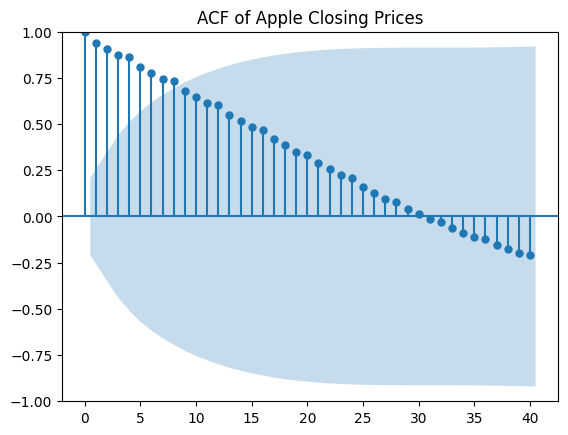

In [39]:
# Plot the Time Series
fig = px.line(gdpchina['GDP'], template = 'plotly_dark')
fig.show()

# Plot the ACF (Correlogram)
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8, 5))
plot_acf(gdpchina['GDP'], lags=40)
plt.title("ACF of Apple Closing Prices")
plt.show()

Next step is to apply a log-transformation to the data. Plot the resulting time series. What is the effect of this transformation?

C:\Users\SLO\AppData\Local\Temp\ipykernel_32568\2458347328.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



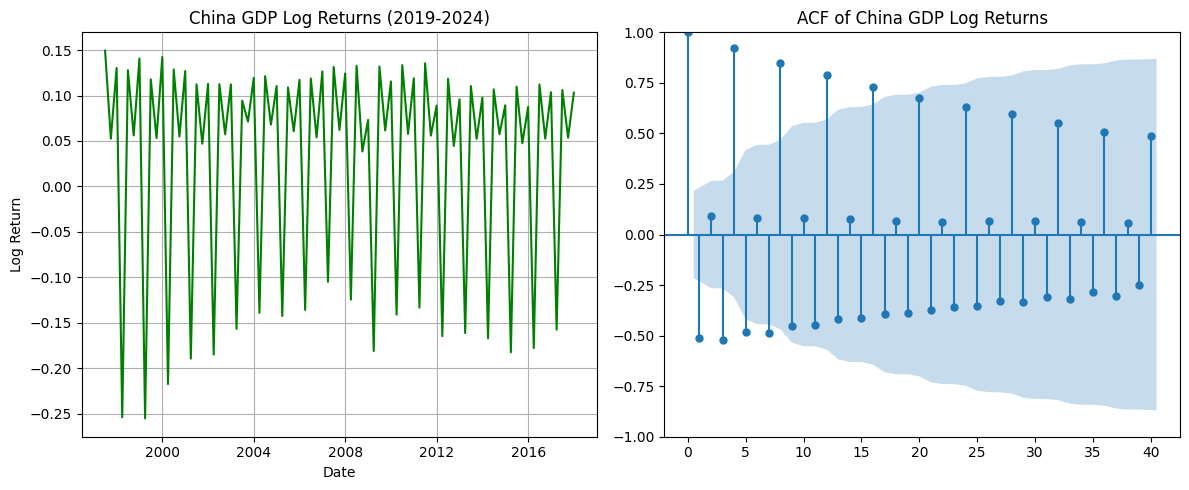

In [49]:
# Apply log transformation


# Plot log-transformed series


import numpy as np

# Compute log-returns
gdpchina['Log Returns'] = np.log(gdpchina['GDP'] / gdpchina['GDP'].shift(1))

# Drop NaN values before plotting
gdpchina = gdpchina.dropna()

# Ensure enough data for ACF lags
max_lags = min(40, len(gdpchina)-1)  # Limit lags if data is too short

# Plot log-returns alongside ACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Log-Returns Plot
axes[0].plot(gdpchina.index, gdpchina['Log Returns'], label='China GDP Log Returns', color='green')
axes[0].set_title("China GDP Log Returns (2019-2024)")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Log Return")
axes[0].grid()

# ACF of Log Returns
plot_acf(gdpchina['Log Returns'], lags=max_lags, ax=axes[1])  # Fix: Ensure lags do not exceed available data
axes[1].set_title("ACF of China GDP Log Returns")

plt.tight_layout()
plt.show()

Let's compute now the difference of two consecutive log-values of the Chinese GDP. You can look at the apple code to see how you can do this. Plot the resulting time series and the correlogram. What do you see?

In [44]:
# First-order differencing (Lag 1)



# Drop NaN values before plotting


# Plot first-order differenced series


# Plot correlogram

# Compute statistics for Apple Log-Returns
logret_mean = gdpchina['Log Returns'].mean()
logret_var = gdpchina['Log Returns'].var()
logret_acf1 = gdpchina['Log Returns'].autocorr(lag=1)  # Autocorrelation at lag 1
logret_acf2 = gdpchina['Log Returns'].autocorr(lag=2)  # Autocorrelation at lag 2
logret_acf3 = gdpchina['Log Returns'].autocorr(lag=3)  # Autocorrelation at lag 3

print("Apple Log Returns Statistics:")
print(f"Mean: {logret_mean:.6f}, Variance: {logret_var:.6f}, Autocorrelation (lag 1): {logret_acf1:.4f}, Autocorrelation (lag 2): {logret_acf2:.4f}, Autocorrelation (lag 3): {logret_acf3:.4f}")


Apple Log Returns Statistics:
Mean: 0.031939, Variance: 0.014641, Autocorrelation (lag 1): -0.5141, Autocorrelation (lag 2): 0.0925, Autocorrelation (lag 3): -0.5352


Let's do one more difference between the values of the series. Let's compute the difference between consecutive observations at lag 4. To do this you can set the argument of the `diff` method to 4. Create the time series plot of the resulting data and its correlogram. What do you observe.

C:\Users\SLO\AppData\Local\Temp\ipykernel_32568\2758979446.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SLO\AppData\Local\Temp\ipykernel_32568\2758979446.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SLO\AppData\Local\Temp\ipykernel_32568\2758979446.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

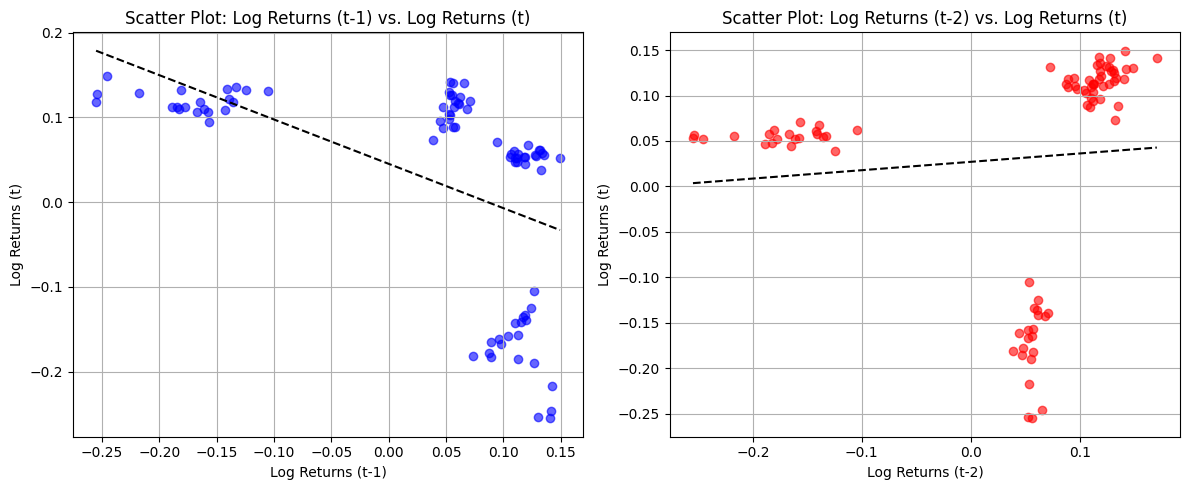

In [45]:
# Seasonal differencing on already differenced series (Lag 4)

# Drop NaN values

# Plot final transformed series


# Plot the correlogram

# Create lagged variables
gdpchina["Log Returns Lag1"] = gdpchina["Log Returns"].shift(1)  # Lag 1
gdpchina["Log Returns Lag2"] = gdpchina["Log Returns"].shift(2)  # Lag 2

# Drop NaN values for plotting
gdpchina.dropna(inplace=True)

# Create scatter plots for lagged relationships
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Lag 1 scatter plot: Log Returns (t-1) vs Log Returns (t)
axes[0].scatter(gdpchina["Log Returns Lag1"], gdpchina["Log Returns"], color="blue", alpha=0.6)
axes[0].set_title("Scatter Plot: Log Returns (t-1) vs. Log Returns (t)")
axes[0].set_xlabel("Log Returns (t-1)")
axes[0].set_ylabel("Log Returns (t)")
axes[0].grid()

# Compute regression line for Lag 1
slope1, intercept1 = np.polyfit(gdpchina["Log Returns Lag1"], gdpchina["Log Returns"], 1)
x_vals1 = np.linspace(gdpchina["Log Returns Lag1"].min(), gdpchina["Log Returns Lag1"].max(), 100)
y_vals1 = slope1 * x_vals1 + intercept1
axes[0].plot(x_vals1, y_vals1, color="black", linestyle="--")  # Add regression line


# Lag 2 scatter plot: Log Returns (t-2) vs Log Returns (t)
axes[1].scatter(gdpchina["Log Returns Lag2"], gdpchina["Log Returns"], color="red", alpha=0.6)
axes[1].set_title("Scatter Plot: Log Returns (t-2) vs. Log Returns (t)")
axes[1].set_xlabel("Log Returns (t-2)")
axes[1].set_ylabel("Log Returns (t)")
axes[1].grid()

# Compute regression line for Lag 2
slope2, intercept2 = np.polyfit(gdpchina["Log Returns Lag2"], gdpchina["Log Returns"], 1)
x_vals2 = np.linspace(gdpchina["Log Returns Lag2"].min(), gdpchina["Log Returns Lag2"].max(), 100)
y_vals2 = slope2 * x_vals2 + intercept2
axes[1].plot(x_vals2, y_vals2, color="black", linestyle="--")  # Add regression line

# Adjust layout
plt.tight_layout()

plt.show()